#AGENDA
##1. INTRODUCCION
##2. ANALISIS INICIAL DE LOS DATOS
##3. INSPECCION DE DATOS Y LIMPIEZA
##4. ANALISIS GRAFICO DE EDA
##5. CONCLUSIONES


##¿Que es EDA?
Son varias tecnicas que permiten analisar e investigar los datos e identificar sus caracteristicas principales de un dataset. Su principal ventaja es proveer visualizacion de datos despues de la conduccion de un analisis.

##2. Analisis inicial de los datos
# La Importancia de Estudiar la Obesidad en Colombia y Perú

El estudio de la obesidad en Colombia y Perú es crucial debido al alarmante incremento de esta condición en ambos países y su impacto en la salud pública. En Colombia, según datos del Ministerio de Salud (2022), el 56.5% de la población adulta presenta sobrepeso u obesidad, con una prevalencia mayor en mujeres (59.4%) que en hombres (52.8%). En niños entre 5-12 años, la tasa de obesidad alcanza el 18.7%.

En Perú, la situación es igualmente preocupante. Según el Instituto Nacional de Estadística e Informática (INEI), el 63.2% de las personas entre 15 y 59 años padecen de sobrepeso u obesidad. En Lima Metropolitana, esta cifra alcanza el 69.2%, siendo la región con mayor prevalencia.

Los costos económicos asociados son significativos. En Colombia, se estima que el tratamiento de enfermedades relacionadas con la obesidad representa el 2.1% del PIB. En Perú, los gastos en salud vinculados a la obesidad superan los 2,000 millones de soles anuales.

Factores como la transición nutricional, el aumento del consumo de alimentos ultraprocesados y el sedentarismo contribuyen a esta problemática. En ambos países, el consumo de bebidas azucaradas aumentó más del 50% en la última década. La urbanización acelerada también ha modificado los patrones alimentarios tradicionales.

Las consecuencias incluyen el aumento de enfermedades no transmisibles como diabetes tipo 2, hipertensión y enfermedades cardiovasculares. En Colombia, el 4.7% de la población tiene diabetes, mientras que en Perú esta cifra alcanza el 3.9%, con tendencia al alza en ambos países.

Estudiar la obesidad en estos contextos es fundamental para desarrollar políticas públicas efectivas, considerando factores socioeconómicos, culturales y ambientales específicos de cada región, permitiendo intervenciones más precisas y efectivas en salud pública.

Este dataset incluye los niveles de estimacion de obesidad en individuos de la ciudad de mexico, peru y colombia, basado en sus habitos alimenticios y condicion fisica.
https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition






Features y explicacion de las features

###gender - Categorica - genero (Female	1035 - Male	1052 )

###age - continua - años de vida ( 14 -61 )

###Height - continua - altura

###Weight - continua - Peso

###family_history_with_overweight - Binaria- tiene familia que sufre de sobrepeso?

###FAVC - Binaria - Comes comida alta en calorias?

###FCVC - entero - Comes vegetales en tus comidas frecuentemente?

###NCP - Continua - Cuantas comidas tienes diariamente?

###CAEC - categorica - Comes algo entre comidas?

###SMOKE - Binaria - Fumas?

###CH20 - continua - Que tanta agua consumes?

###SCC - Binaria - Monitoreas las calorias consumidas?

###FAF - Continua - haces actividad fisica?

###TUE - Entero - cuanto tiempo usas tecnologia?

###CALC - Categorica - Que tanto tomas alcohol?

###MTRANS - Categorica - Que transporte usas?

###NObeyesdad - categorica - Nivel de obesidad


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv("/content/drive/MyDrive/Datasets_cienciadatos/ObesityDataSet_raw_and_data_sinthetic.csv")
data.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
data.tail(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
data.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1243,Male,26.271621,1.660955,90.000000,yes,yes,2.000000,3.0,Sometimes,no,3.000000,no,0.669278,0.505266,Sometimes,Automobile,Obesity_Type_I
412,Male,33.000000,1.850000,85.000000,no,yes,2.000000,3.0,Frequently,no,2.000000,no,1.000000,0.000000,Sometimes,Automobile,Normal_Weight
397,Male,20.000000,1.660000,60.000000,no,yes,2.000000,4.0,Frequently,no,3.000000,no,0.000000,0.000000,no,Public_Transportation,Normal_Weight
1631,Male,29.687488,1.909198,129.679131,yes,yes,2.088680,3.0,Sometimes,no,1.520215,no,1.857351,0.000000,Sometimes,Public_Transportation,Obesity_Type_II
1120,Male,23.806789,1.732492,84.557797,yes,yes,2.992205,3.0,Sometimes,no,2.413813,no,0.458237,0.688293,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [8]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [10]:
gender = data.drop_duplicates().groupby(["Gender"]).agg({"Gender": "count"})
gender

,Gender
Gender,
Female,1035
Male,1052


In [11]:
family = data.drop_duplicates().groupby(["family_history_with_overweight"]).agg({"family_history_with_overweight": "count"})
family

,family_history_with_overweight
family_history_with_overweight,
no,365
yes,1722


In [12]:
FAVC = data.drop_duplicates().groupby(["FAVC"]).agg({"FAVC": "count"})
FAVC

,FAVC
FAVC,
no,243
yes,1844


In [13]:
fuma = data.drop_duplicates().groupby(["SMOKE"]).agg({"SMOKE": "count"})
fuma

,SMOKE
SMOKE,
no,2043
yes,44


In [14]:
scc= data.drop_duplicates().groupby(["SCC"]).agg({"SCC": "count"})
scc

,SCC
SCC,
no,1991
yes,96


In [15]:
calorias = data.drop_duplicates().groupby(["CALC"]).agg({"CALC": "count"})
calorias

,CALC
CALC,
Always,1
Frequently,70
Sometimes,1380
no,636


In [16]:
MTRANS = data.drop_duplicates().groupby(["MTRANS"]).agg({"MTRANS": "count"})
MTRANS

,MTRANS
MTRANS,
Automobile,456
Bike,7
Motorbike,11
Public_Transportation,1558
Walking,55


In [17]:
NObeyesdad = data.drop_duplicates().groupby(["NObeyesdad"]).agg({"NObeyesdad": "count"})
NObeyesdad

,NObeyesdad
NObeyesdad,
Insufficient_Weight,267
Normal_Weight,282
Obesity_Type_I,351
Obesity_Type_II,297
Obesity_Type_III,324
Overweight_Level_I,276
Overweight_Level_II,290


In [18]:
CAEC = data.drop_duplicates().groupby(["CAEC"]).agg({"CAEC": "count"})
CAEC

,CAEC
CAEC,
Always,53
Frequently,236
Sometimes,1761
no,37


In [19]:
#3.4 Valores perdidos
valores_perdidos = data.isnull().sum()
print("valores perdidos: ")
valores_perdidos

valores perdidos: 


,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [20]:
#3.6 Valores Duplicados
duplicate_rows = data.duplicated().sum()
print("valores duplicados: ")
duplicate_rows

valores duplicados: 


24

In [21]:
#Eliminando registros duplicados
data = data.drop_duplicates()
display(data)
#24 registros fueron eliminados.

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [22]:
#3.7 identificacion de NaN
#Revisando si existen valores NaN
print(data.isna())

      Gender    Age  Height  Weight  family_history_with_overweight   FAVC  \
0      False  False   False   False                           False  False   
1      False  False   False   False                           False  False   
2      False  False   False   False                           False  False   
3      False  False   False   False                           False  False   
4      False  False   False   False                           False  False   
...      ...    ...     ...     ...                             ...    ...   
2106   False  False   False   False                           False  False   
2107   False  False   False   False                           False  False   
2108   False  False   False   False                           False  False   
2109   False  False   False   False                           False  False   
2110   False  False   False   False                           False  False   

       FCVC    NCP   CAEC  SMOKE   CH2O    SCC    FAF    TUE   

In [23]:
## 3.8 Identificacion de valores infinitos
data.isin([np.inf, -np.inf])
print(data)

      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>,
        <Axes: title={'center': 'CH2O'}>],
       [<Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>,
        <Axes: >]], dtype=object)

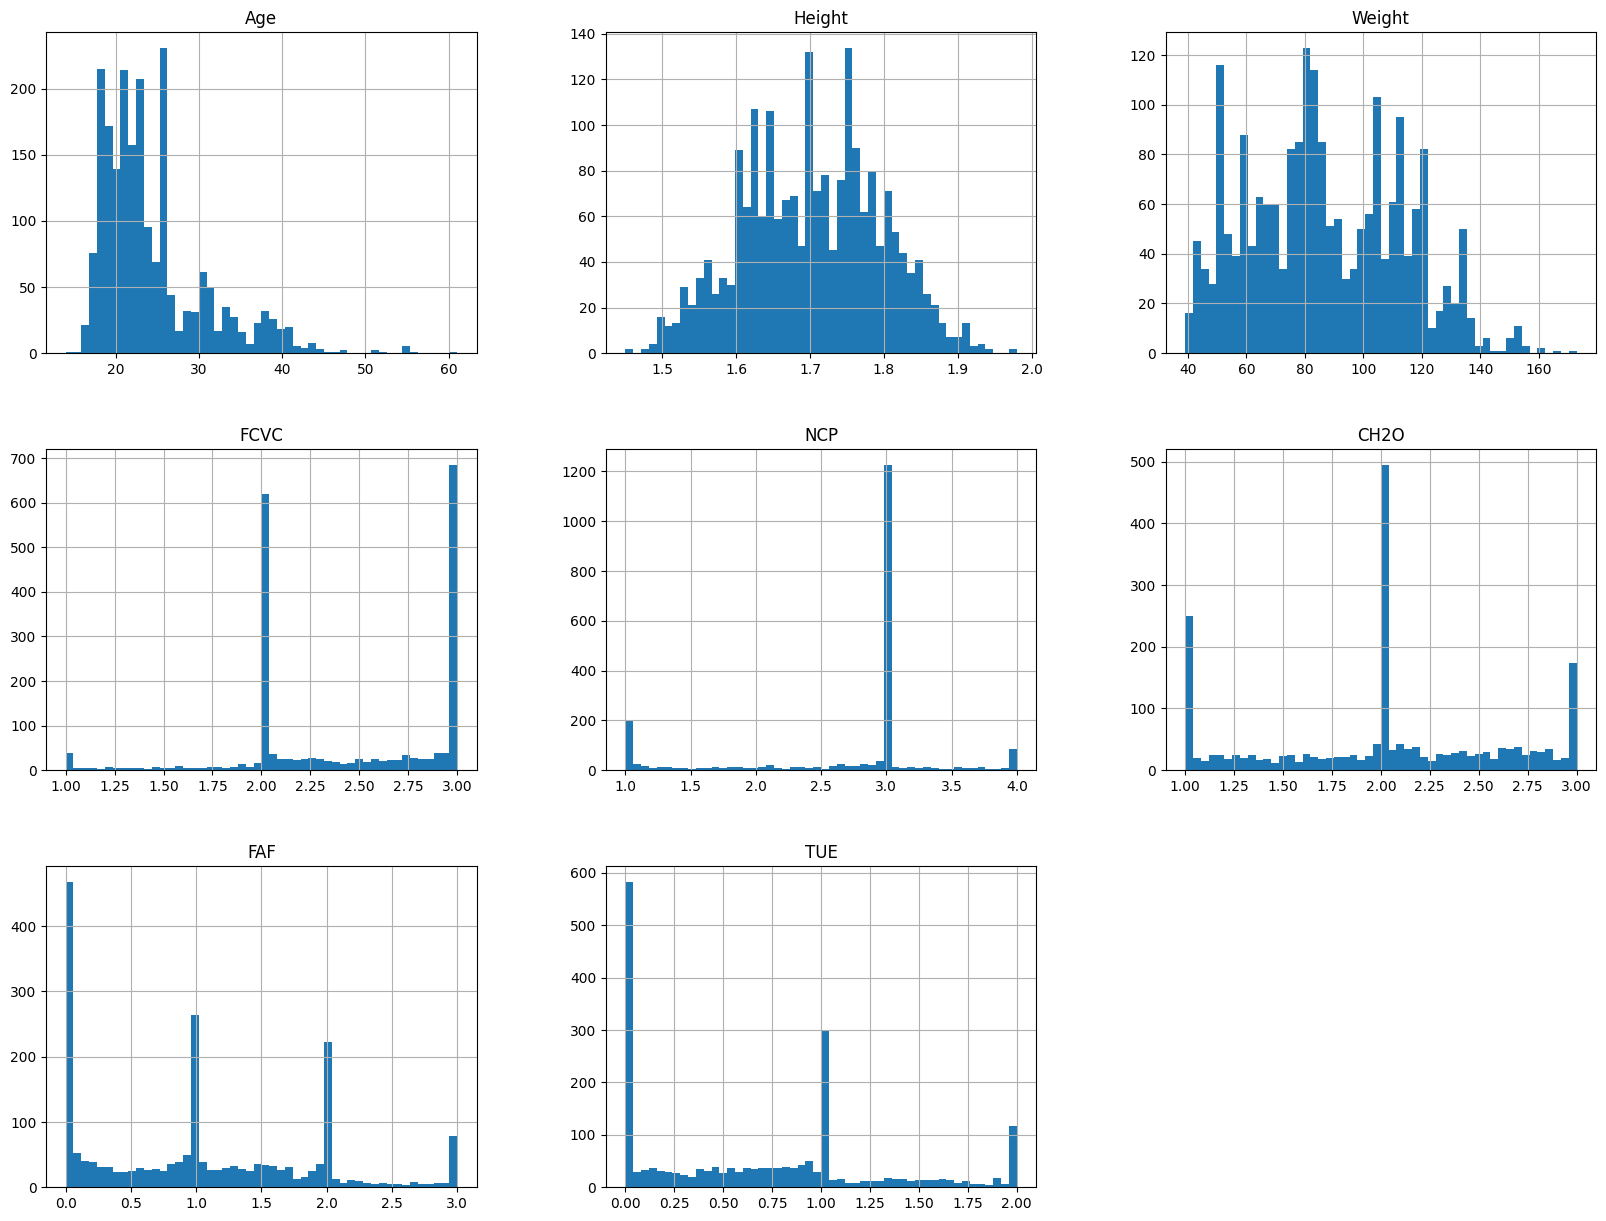

In [24]:
#3.9 Analisis grafico EDA
#dibujando histogramas para diferentes parametros
data.hist(bins=50, figsize=(20,15))


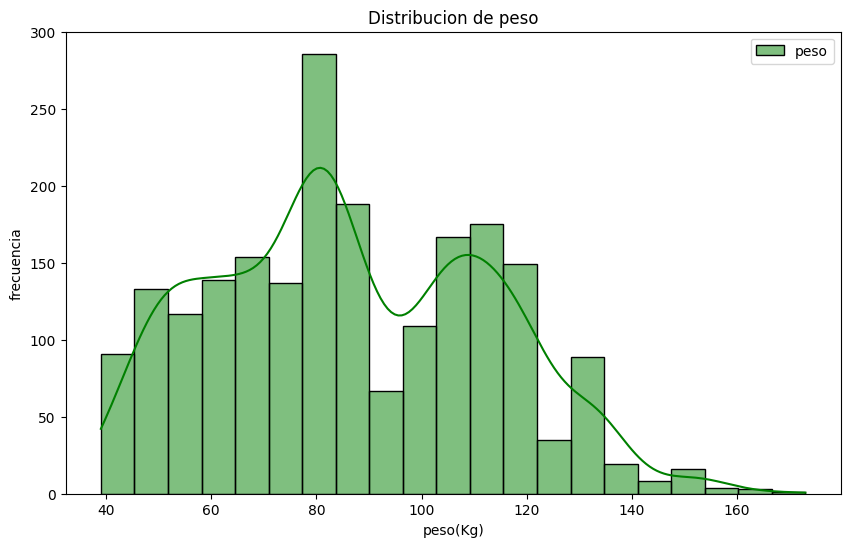

In [25]:
#Dibujando distribucion ponderada
plt.figure(figsize=(10,6))
sns.histplot(data=data,x="Weight",color="green",kde=True,label="peso")
plt.title("Distribucion de peso")
plt.xlabel("peso(Kg)")
plt.ylabel("frecuencia")
plt.legend()
plt.show()


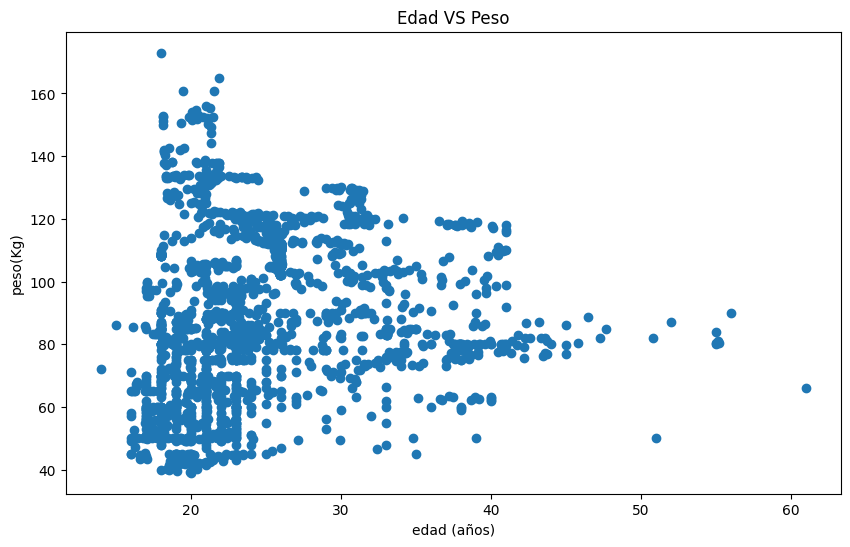

In [26]:
#Graficando scatter plot (diagrama de dispercion ) para evaluar edad vs peso
fi,ax=plt.subplots(figsize=(10,6))
ax.scatter(data["Age"],data["Weight"])
plt.title("Edad VS Peso")
plt.xlabel("edad (años)")
plt.ylabel("peso(Kg)")
plt.show()


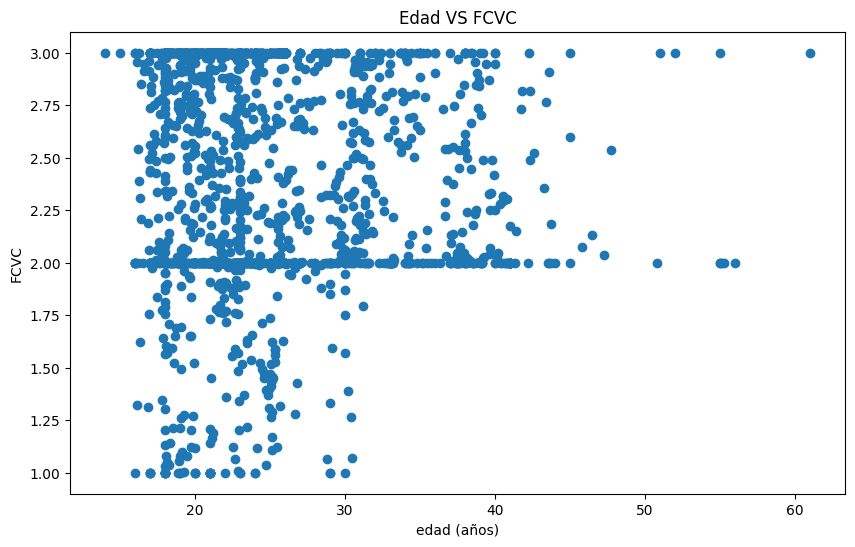

In [27]:
#Analisis de dispersion entre edad y FCVC
fi,ax=plt.subplots(figsize=(10,6))
ax.scatter(data["Age"],data["FCVC"])
plt.title("Edad VS FCVC")
plt.xlabel("edad (años)")
plt.ylabel("FCVC")
plt.show()

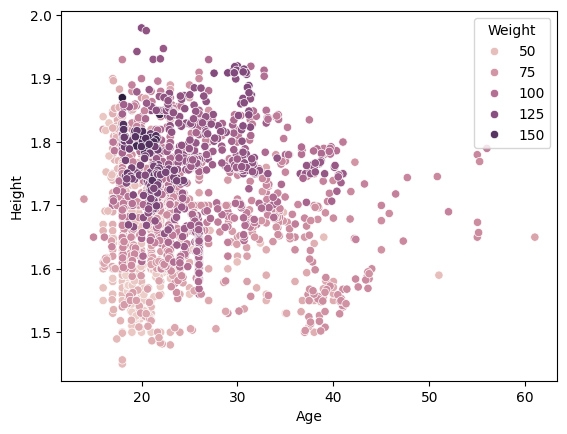

In [28]:
#Diagrama de dispercion entre edad vs estatura para diferentes pesos
scatter_p= sns.scatterplot(x="Age", y="Height",
                            hue="Weight",
                            data=data)

Text(0.0, 1.0, 'Altura VS peso')

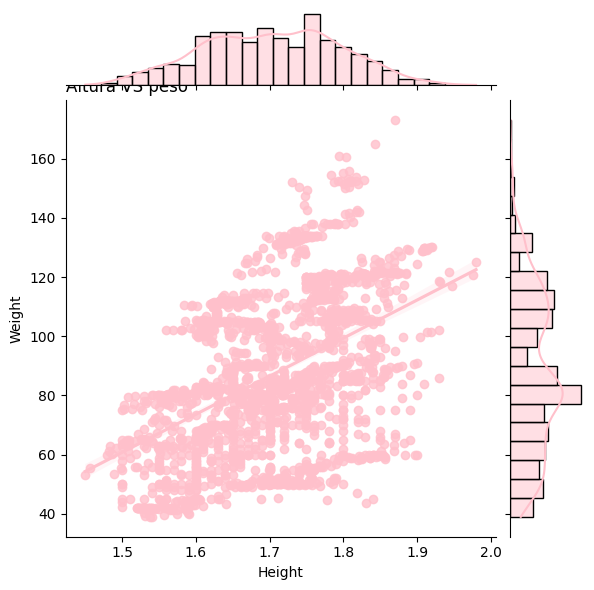

In [29]:
sns.jointplot(x="Height",y="Weight",data=data,kind="reg", color="pink")
plt.title("Altura VS peso", loc="left")

In [30]:
#Analisis entre edad VS promedio de peso para el top 15 de edades
top_15_ages=data.groupby("Age")["Weight"].mean().nlargest(15)
top_15_ages

,Weight
Age,
21.900120,165.057269
19.472190,160.935351
21.521294,160.639405
20.989016,155.872093
21.291969,155.242672
20.327723,154.618446
20.102241,153.959945
20.438478,153.149491
18.112503,152.720545


In [31]:
data["Age"]=data.Age.round(2)

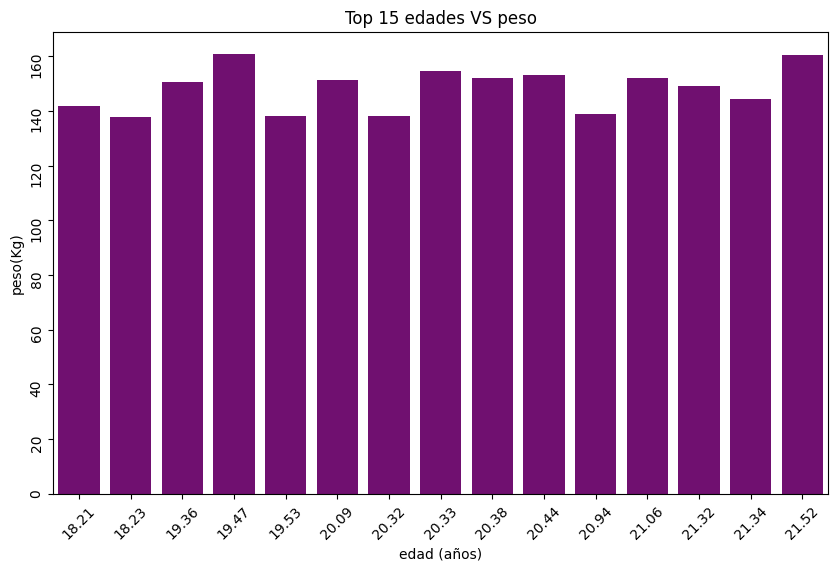

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_15_ages.index, y=top_15_ages.values , color="Purple")
plt.title("Top 15 edades VS peso")
plt.xlabel("edad (años)")
plt.ylabel("peso(Kg)")
plt.xticks(rotation=45)
plt.yticks(rotation=90)
plt.show()

In [32]:
data["CALC"]=data["CALC"].astype("category")
data["CALC"]

,CALC
0,no
1,Sometimes
2,Frequently
3,Frequently
4,Sometimes
...,...
2106,Sometimes
2107,Sometimes
2108,Sometimes
2109,Sometimes


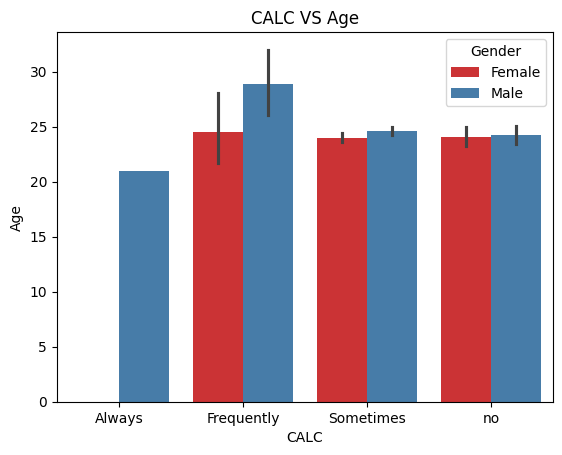

In [33]:
sns.barplot(x="CALC",y ="Age", data=data, hue="Gender", palette="Set1")
plt.title("CALC VS Age")
plt.xlabel("CALC")
plt.ylabel("Age")
plt.show()

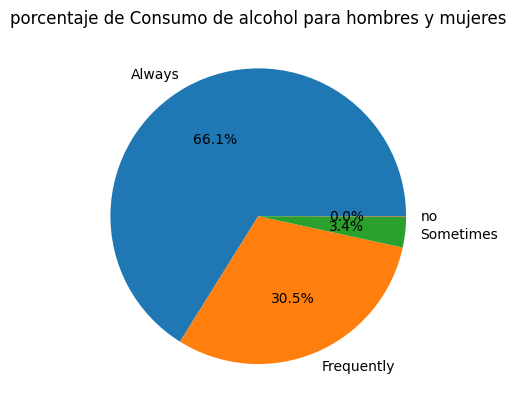

In [34]:
#Diagrama de torta para mostrar el % de consumo de alcohol
count= data["CALC"].value_counts()
labels=("Always","Frequently","Sometimes","no")
vals=count.values
plt.pie(vals,labels=labels,autopct="%1.1f%%")
plt.title("porcentaje de Consumo de alcohol para hombres y mujeres")
plt.show()

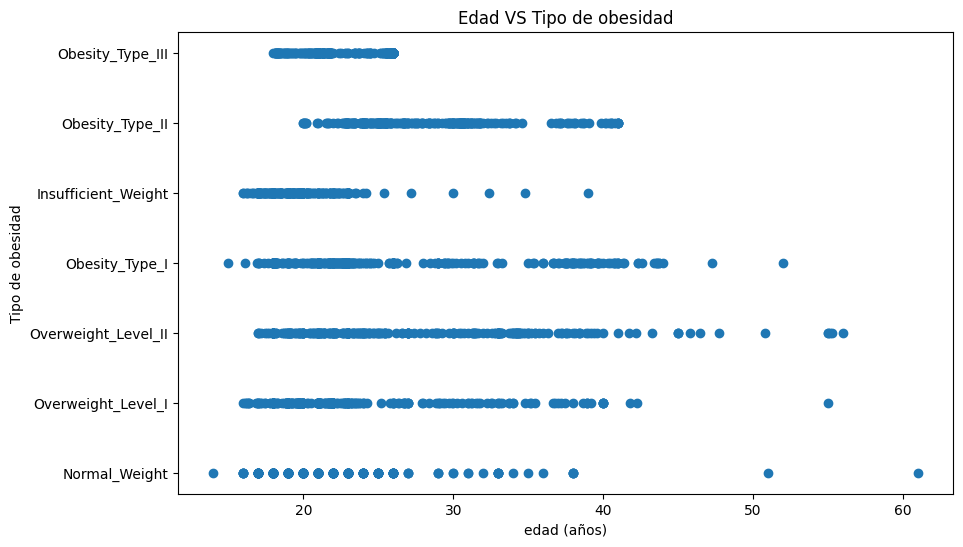

In [35]:
#graficando edad vs tipo de obesidad usando diagrama de dispersion
#Age vs NOBeyesdad

fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(data["Age"],data["NObeyesdad"])
plt.title("Edad VS Tipo de obesidad")
plt.xlabel("edad (años)")
plt.ylabel("Tipo de obesidad")
plt.show()